In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import random
from tqdm import tqdm
import cv2

In [2]:
Data_path="C:\model train\Imagedata"

In [3]:
classes=os.listdir(Data_path)
train_data=[]

for i,c in enumerate(classes):
    path = os.path.join(Data_path,c)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path,img))
        img_arr = cv2.resize(img_arr,(128,128))
        train_data.append([img_arr,i])
print(len(train_data))


100%|██████████| 12/12 [00:00<00:00, 95.06it/s]

516


In [4]:
random.shuffle(train_data)

In [5]:
train_imgs = []
train_labels = []

for img, label in train_data:
    train_imgs.append(img)
    train_labels.append(label)


In [6]:
import numpy as np
train_imgs_np = np.array(train_imgs)
train_labels_np = np.array(train_labels)

print(train_imgs_np.shape, train_labels_np.shape)


(516, 128, 128, 3) (516,)


In [7]:
train_imgs_np=train_imgs_np / 255.0

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    keras.Input(shape=(128, 128, 3)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='tanh'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 512)       1

In [9]:
learning_rate = 0.001
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
h = model.fit(x=train_imgs_np, y=train_labels_np, epochs=20, validation_split=0.4, batch_size=305)

Epoch 1/20
2/2 [==============================] - 3s 1s/step - loss: 3.4842 - accuracy: 0.0680 - val_loss: 3.5046 - val_accuracy: 0.0628
Epoch 2/20
2/2 [==============================] - 2s 1s/step - loss: 3.5702 - accuracy: 0.0227 - val_loss: 3.4647 - val_accuracy: 0.0193
Epoch 3/20
2/2 [==============================] - 2s 954ms/step - loss: 3.4693 - accuracy: 0.0194 - val_loss: 3.4573 - val_accuracy: 0.0386
Epoch 4/20
2/2 [==============================] - 2s 1s/step - loss: 3.4587 - accuracy: 0.0615 - val_loss: 3.4531 - val_accuracy: 0.0193
Epoch 5/20
2/2 [==============================] - 2s 1s/step - loss: 3.4564 - accuracy: 0.0194 - val_loss: 3.4495 - val_accuracy: 0.0483
Epoch 6/20
2/2 [==============================] - 2s 893ms/step - loss: 3.4531 - accuracy: 0.0583 - val_loss: 3.4529 - val_accuracy: 0.0483
Epoch 7/20
2/2 [==============================] - 2s 1s/step - loss: 3.4625 - accuracy: 0.0518 - val_loss: 3.4374 - val_accuracy: 0.0773
Epoch 8/20
2/2 [===================

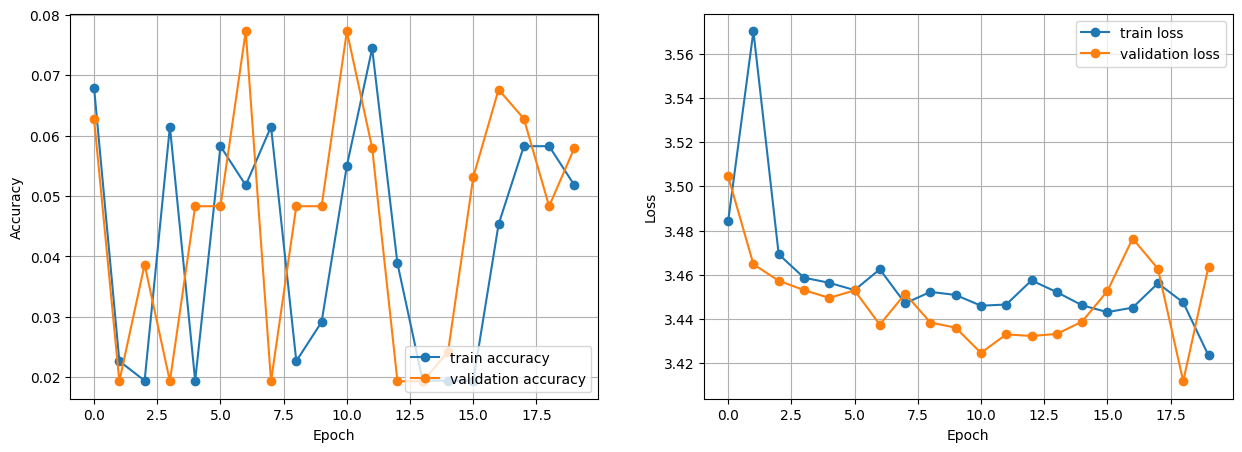

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [12]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    input_data = cv2.resize(frame, (128, 128))
    input_data = input_data / 255.0
    input_data = np.expand_dims(input_data, axis=0)

    prediction = model.predict(input_data)
    predicted_label = classes[np.argmax(prediction)]

    cv2.putText(frame, f'Prediction: {predicted_label}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow('Webcam Prediction', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()